In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as stats
import hvplot.pandas
from scipy.stats import linregress
import seaborn as sns

In [23]:
df = pd.read_csv(r"heart_2020_cleaned.csv")

In [24]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [25]:
#rename heartdisease 
df['HeartDisease'].replace(['No', 'Yes'],[0, 1], inplace=True)

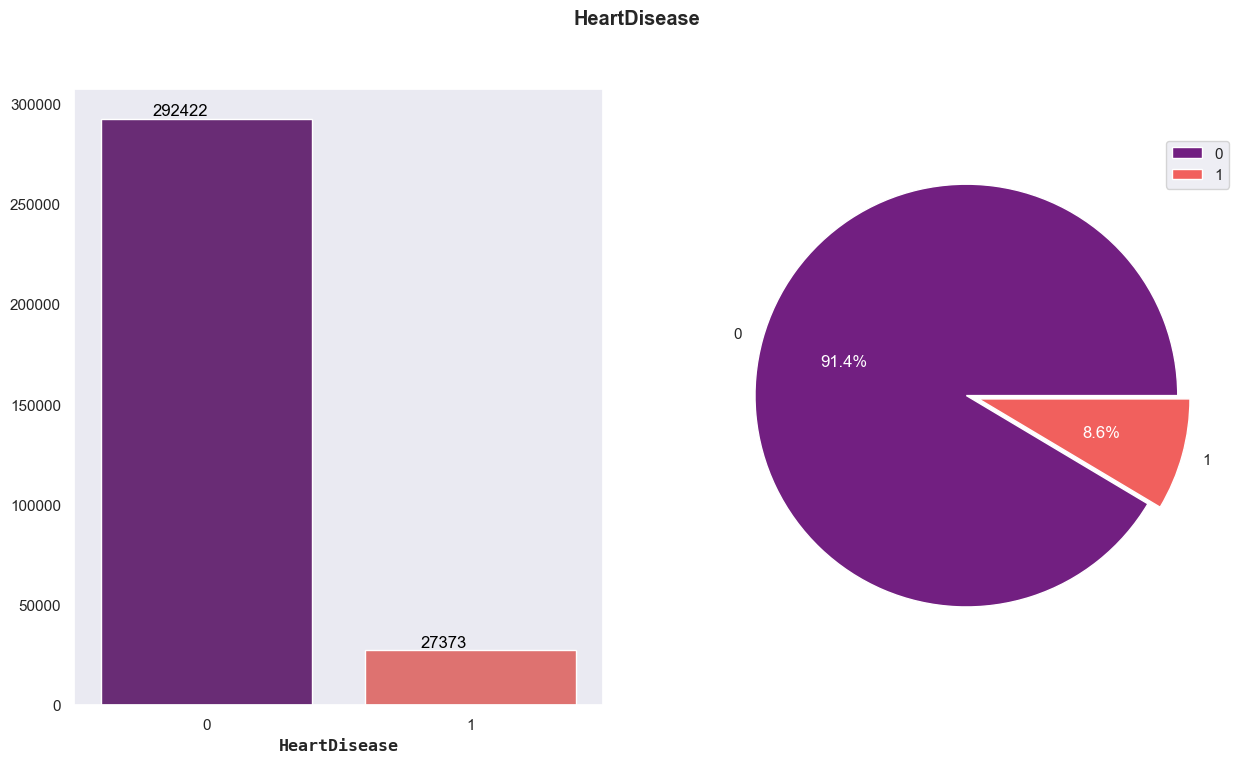

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['HeartDisease'].value_counts().index
y=df['HeartDisease'].value_counts().values.tolist()
data = df.groupby("HeartDisease").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('HeartDisease', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['HeartDisease'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('HeartDisease',weight = 'bold')
plt.show()

In [27]:
#rename smoking
df['Smoking'].replace(['No', 'Yes'],[0, 1], inplace=True)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,0,20.34,0,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,0,26.58,1,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,0,24.21,0,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,0,23.71,0,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [28]:
#two sample t-test Smoking & heart disease
Smoker = df[df['Smoking'] == 1]['HeartDisease']
Non_Smoker = df[df['Smoking'] == 0]['HeartDisease']

# Step 3: Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(Non_Smoker, Smoker)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between the two groups.")


T-statistic: -61.297861168863285
P-value: 0.0
Reject the null hypothesis - There is a significant difference between the two groups.


In [29]:
stats.ttest_1samp(Smoker, Non_Smoker.mean())

TtestResult(statistic=68.06325795910975, pvalue=0.0, df=131907)

In [30]:
Drinker = df[df['AlcoholDrinking'] == 1]['HeartDisease']
Non_Drinker = df[df['AlcoholDrinking'] == 0]['HeartDisease']
# Step 3: Perform the two-sample t-test
t_stat, p_value= stats.ttest_ind(Non_Drinker, Drinker)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between the two groups.")


T-statistic: nan
P-value: nan
Fail to reject the null hypothesis - There is no significant difference between the two groups.


In [31]:
stats.ttest_1samp(Drinker,Non_Drinker.mean())


TtestResult(statistic=nan, pvalue=nan, df=nan)

In [33]:
#categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns 

['AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [34]:
mypal = ['#FF5733', '#33FF57', '#3373FF', '#FF33F3', '#B4FFE4']

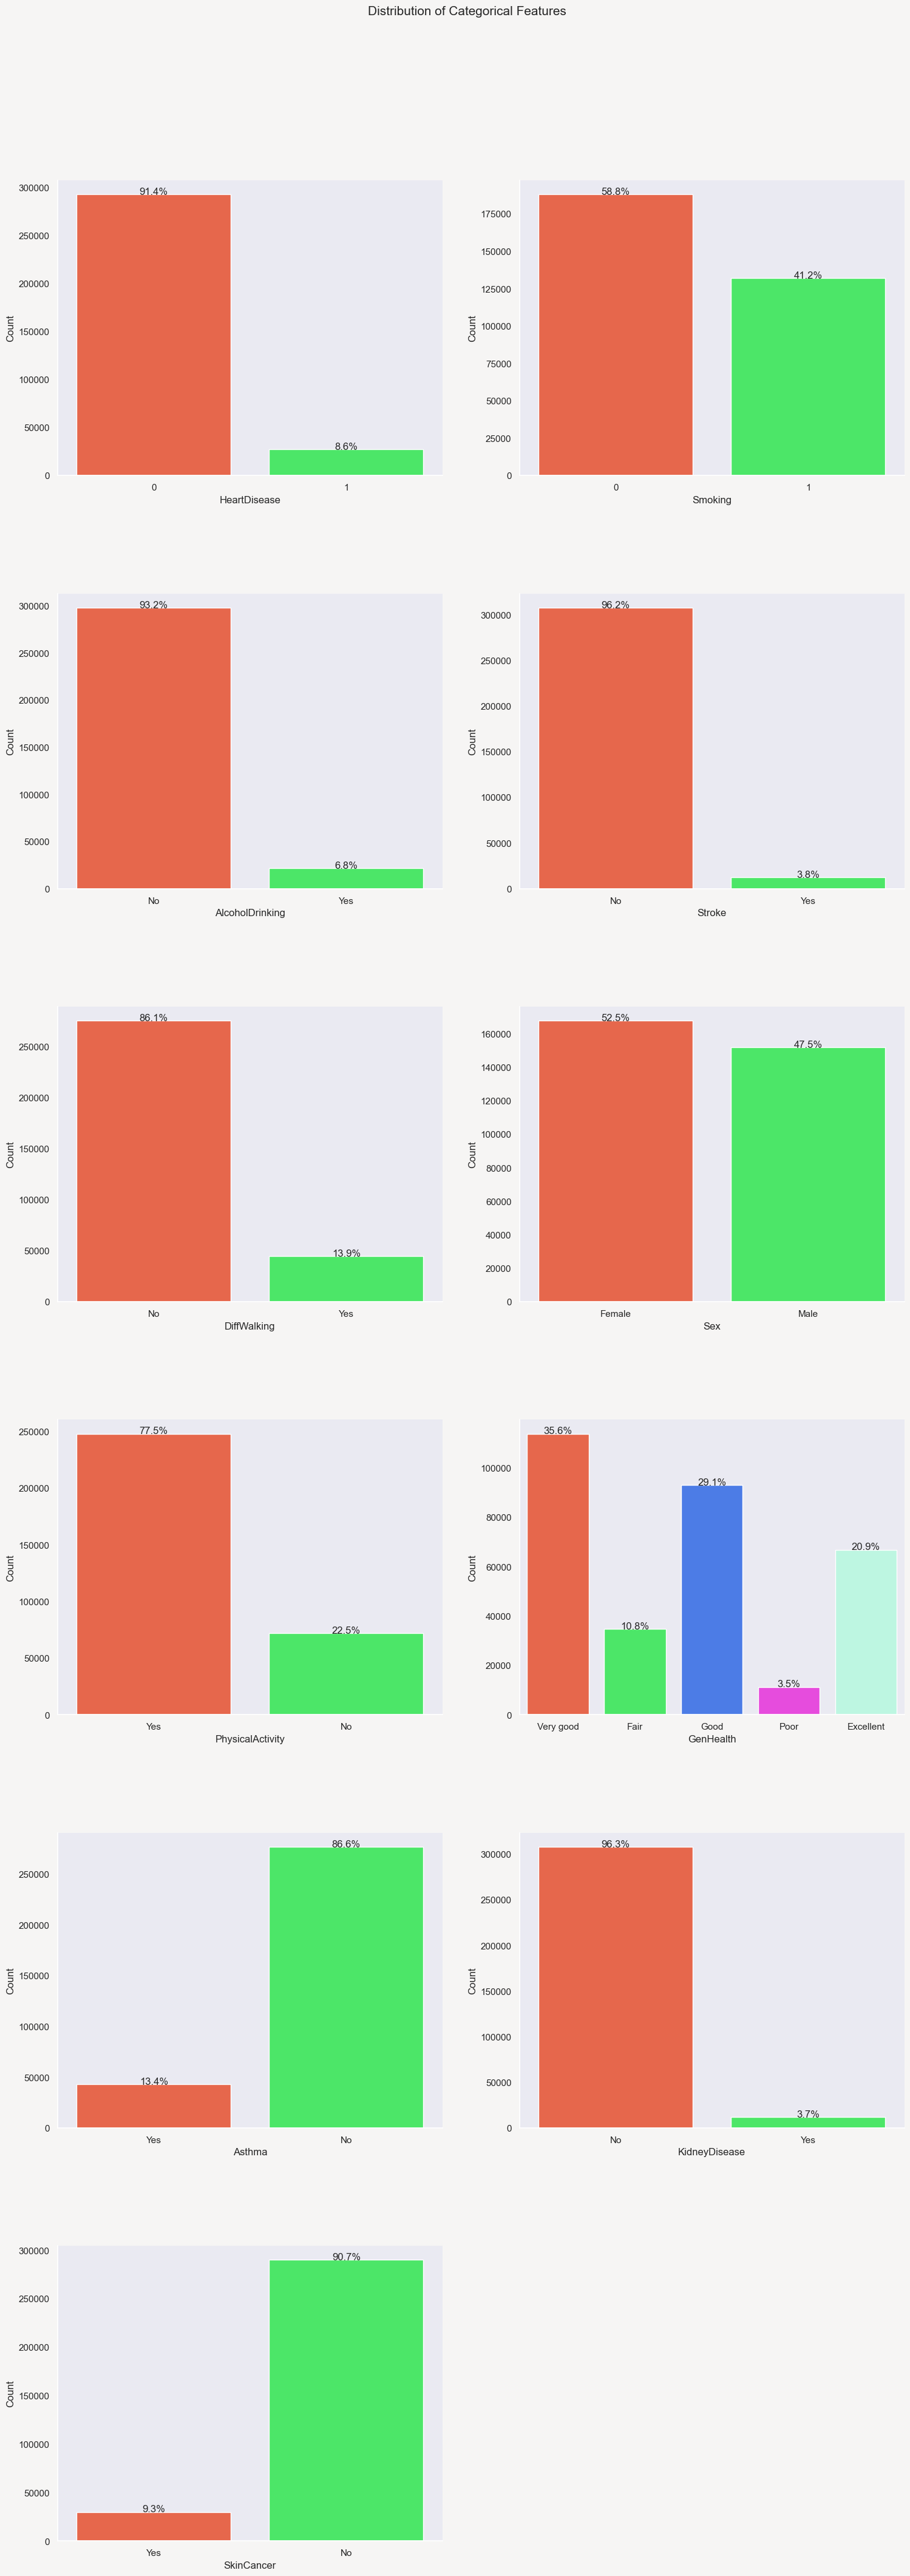

In [35]:
category_feats = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

L = len(category_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(18, 8 * nrow), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2)  

i = 0
for col in category_feats:
    ax = axs[i // ncol, i % ncol]
    sns.countplot(data=df, x=col, palette=mypal, ax=ax)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    sns.despine(right=True, ax=ax)
    sns.despine(offset=0, trim=False, ax=ax)

    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

    i += 1
    
if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features', fontsize=15)
plt.show()